In [35]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv("./abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [37]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Rings')

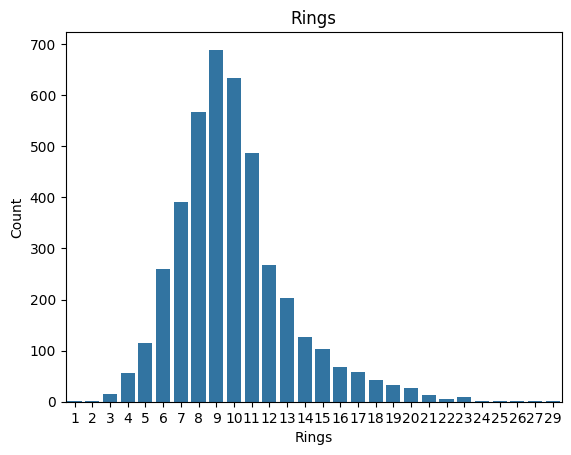

In [38]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings")

In [39]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [40]:
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [41]:
#get_dummines()를 사용한 원핫 인코더 - True, False 로 나옴 
#df_encoded = pd.get_dummies(df, columns=['Sex'], prefix='Sex')

In [42]:
#print(df_encoded.head())

In [43]:
encoder = OneHotEncoder()
sex_encoded = encoder.fit_transform(df[['Sex']]).toarray()

# 인코딩된 Sex 컬럼을 데이터프레임으로 변환 후 기존 컬럼에 추가
sex_columns = encoder.get_feature_names_out(['Sex'])
sex_df = pd.DataFrame(sex_encoded, columns=sex_columns)
df = pd.concat([df, sex_df], axis=1)

# 필요 없는 원래 Sex 컬럼 삭제
df = df.drop(columns=['Sex'])

In [44]:
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1.0,0.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0.0,0.0,1.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0.0,0.0,1.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1.0,0.0,0.0


In [45]:
X=df.drop('Rings',axis=1)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0


In [67]:
y=df['Rings']
y.value_counts()
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y_encoded,test_size=0.2,random_state=0) 

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [70]:
#SVM
from sklearn.svm import SVC  

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.24880382775119617
[[ 0  3  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0 21  2  0  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 26 10  4  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 27 21 18 30  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  8 43 51  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 23 72 25  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  8 52 29 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  7 40 31 16  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3 27 26  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 17 12  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 14  6  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  8  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6  6  1  0  0  0  0  0  0  0  0  0  0 

In [71]:
#LR
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.25598086124401914
[[ 0  0  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 21  7  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 23 13  5  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 19 28 25 24  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 10 51 40  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 29 51 35  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 12 33 41 16  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 16 22 34 18  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6 21 25 13  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  6 18 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  9 10  3  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2 11  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  4  6  3  0  0  0  0  0

In [72]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print("\n--- K-Nearest Neighbors Classifier ---")
print(f'Accuracy: {accuracy_score(y_test, pred_knn):.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred_knn))


--- K-Nearest Neighbors Classifier ---
Accuracy: 0.22
Confusion Matrix:
[[ 1  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  3  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8 11  7  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5 10 17 11  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  6 31 27 24  3  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  4 20 37 27 17  3  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  2 15 36 36 24  8  3  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  1 12 19 26 28 11  5  3  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  3 16 33 16 13  3  3  0  2  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  4  7 15 16 12  5  3  0  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  1 12  9 12  1  1  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  3  2  3  5  2  3  3  1  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  5  4  2  3  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  2  3  2  

In [73]:
#DT

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.20454545454545456
[[ 4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  5  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  9  7  6  7  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  5 13 14  9  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 18 32 27  9  4  1  0  1  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  7 17 28 25 16  6  6  2  1  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  4 32 30 17 15  8  7  1  4  3  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  6 15 26 21 17  8  4  4  1  1  0  2  0  2  0  0  0  0  0]
 [ 0  0  0  1  7  9 13 29 14  5  4  6  4  1  0  1  0  0  0  0  1  0  0]
 [ 0  0  0  1  0  9 13 12  7  7  3  5  1  1  1  0  2  0  1  0  2  1  0]
 [ 0  0  0  0  0  2  9  4  6  6  4  0  1  2  1  1  0  1  0  0  2  0  0]
 [ 0  0  0  0  0  2  2  5  4  3  3  3  0  2  1  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  2  3  2  3  1  1  3  0  0  1  1  0  0  0  0  0  0]
 [ 0  0  0

In [74]:
#RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.24641148325358853
[[ 0  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7 12 10  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5 20 11  7  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 20 30 35  5  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  1 18 46 20 15  6  2  0  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  7 28 31 37 12  3  4  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  2  5  8 27 30 18  8  4  2  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 10 21 33 21  2  3  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  5 17 20 12  6  4  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  5  6 13  8  2  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  6  3  4  3  1  2  2  2  1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  3  5  1  4  0  1  1  1  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  3  1  1  2  2  0  1  0  1  0  0  0  0